# Introduction to Jupyter Notebook

Evaluate simple expressions

In [3]:
1 + 1

2

Another simple expression

In [2]:
'Hello, world!'

'Hello, world!'

Cells may contain more than one line of code

In [4]:
number_of_seconds_in_a_year = 365 * 24 * 60 * 60
number_of_seconds_in_a_year / 1e6

31.536

Even an entire program!

In [6]:
from collections import Counter

my_list_counter = Counter([1, 2, 4, 3, 6, 4, 2, 7, 6, 4, 3, 4, 2, 2, 2, 3, 13, 5, 2, 7])

print(my_list_counter)

Counter({2: 6, 4: 4, 3: 3, 6: 2, 7: 2, 1: 1, 13: 1, 5: 1})


All cells are executed in a python kernel. This means that variables and definitions introduced in cells already executed are available in other cells

In [7]:
print(my_list_counter.most_common(3))

[(2, 6), (4, 4), (3, 3)]


The number in brackets refers to the order of execution. Re-execute one of the above cells and watch the number increment. Note that if you update a cell and re-execute it, you need to re-execute all dependent cells. Jupyter Notebook does not have a constraint propagation engine like spreadsheets do. Avoid cells that are dependent of cells below it.

## Things to do with markdown

Paragraphs are separated by blank lines.
This sentence is in the same paragraph as the sentence before.

But this sentence begins a new paragraph. You can break a line  
if you end it with two spaces.

Using non-ASCII, unicode characters is OK: blåbærsyltetøy! 🙂, $, €, 🤷.

To find the unicode code for a character, look it up. For example, google "unicode for euro symbol", which will tell you that the code is `U+20AC`. In a code cell, do the following:

In [8]:
print('\u20AC')

€


Then, copy-paste the output into a markdown cell.

### Numbered lists and bullet lists

Numbered (ordered) list:
1. First
3. Second
    1. Indented
        1. Blah
        1. Baz
    2. Another
        1. Foo
2. Third

Bullet (unordered) list:
* One fish
+ Two fish
    + Red fish
    * Blue fish
    
Mixed lists:
1. first outer
    - first inner
    - second inner  
      broken into two lines
2. second outer

### Links

At http://resmed.com you can read about [sleep apnea](https://www.resmed.com/us/en/consumer/diagnosis-and-treatment/what-is-sleep-apnea.html#).

### Emphasized text

* Some *italics* text.
* Some **bold** text
* Some ***bold italics*** text
* Some ~~strikethrough~~ text

### Code

Use back ticks: `print('Hello, world!')`

Use triple back ticks for code blocks. Here's a Python function:

```Python
def double_it(x):
    return 2 * x
```
Same in Java:

```Java
public double doubleIt(double x) {
    return 2.0 * x;
}
```

You can also use triple back ticks when you want to control alignment:

```
[[1.0, 0.0],
 [0.0, 1.0]]
```

### Images

Here's Tux, the Linux mascot:
![Tux, the Linux mascot](assets/tux.png)

The path to the image (which is `assets/tux.png`) is relative to the folder where the notebook resides. Another possibility would have been to provide a URL like this one: `https://upload.wikimedia.org/wikipedia/commons/a/af/Tux.png`

### Latex

You can insert mathematical expressions and equations using [LaTeX](https://www.latex-project.org/)

**Example:**

The cost function is:

$$\mbox{cost}(\hat y) = \sum_{i = 0}^n (\hat y_i - y_i)^2$$

Same equation inline:

The cost can be calculated using the expression $\sum_{i = 0}^n (\hat y_i - y_i)^2$.

(To escape the \\$-sign, use two backslashes like this: `\\$`.)

## References

[1] [Basic Syntax | Markdown Guide](https://www.markdownguide.org/basic-syntax/)

## Linear regression example

In this example we have data $y$ that grows exponentially as a function of $X$. 
Instead of fitting $y$ to a linear model, we fit $z = \ln(y)$.

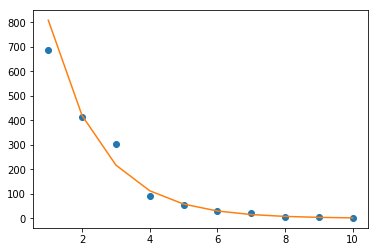

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from math import log, exp

X = [[x_i] for x_i in range(1, 11)]
y = [688.13, 415.87, 302.17, 90.51, 55.72, 32.0, 21.11, 6.96, 4.29, 2.0]
z = [log(i) for i in y]
model = LinearRegression().fit(X, z)
z_hat = model.predict(X)
y_hat = [exp(i) for i in z_hat]
plt.plot(X, y, 'o')
plt.plot(X, y_hat)
#plt.show()

In [8]:
from IPython.display import display, Markdown
s = f'''\
+ y-intercept = {model.intercept_}
+ coefficients = {model.coef_}'''
display(Markdown(s))

+ y-intercept = 7.352686002293646
+ coefficients = [-0.65673862]

In [9]:
s = '$$\hat y = e^{%.2f + %.2fx} = e^{%.2f}e^{%.2fx}$$' % \
     (model.intercept_, model.coef_[0], model.intercept_, model.coef_[0])

display(Markdown('The prediction is:  ' + s))

The prediction is:  $$\hat y = e^{7.35 + -0.66x} = e^{7.35}e^{-0.66x}$$

We can calculate $e^{7.35}$:

In [10]:
exp(model.intercept_)

1560.3820939839895

###### Which gives:
$\hat{y} = 1560e^{-0.66x}$

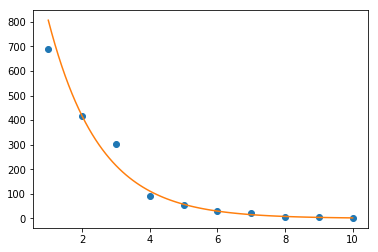

In [11]:
x = [i/10 for i in range(10, 101)]
y_hat = [1560 * exp(-0.66 * x_i) for x_i in x]
plt.plot(X, y, 'o')
plt.plot(x, y_hat)